# WTI COT MM Nowcasting EDA 

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import warnings
warnings.filterwarnings("ignore")


In [3]:
import numpy as np
import pandas as pd 

In [4]:
import scipy.stats as stats

In [5]:
import sys
sys.path.append('../../../')

In [6]:
import matplotlib.pyplot as plt 

In [7]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


In [8]:
from src.utils.dates import get_nyse_business_dates
from src.utils.io.read import PreprocessedDataReader

In [9]:
from src.preprocessing.base import FutureTicker

In [10]:
from src.settings import Settings

In [11]:
from research.metrics import get_features_responses_correlation
from research.plots import plot_bin_summary_of_xy

In [12]:
pdr = PreprocessedDataReader(Settings.historical.paths.PREPROCESSED_DATA_PATH)                    

In [13]:
dataset = pdr.read_dataset(ticker=FutureTicker.WTI)

In [14]:
dataset.shape

(813, 81)

In [15]:
dataset.tail(3)

,tradeDate,Name,Commercial_NetPosition,CommercialLongPosition,CommercialShortPosition,ManagedMoney_NetPosition,ManagedMoney_LongPosition,ManagedMoney_ShortPosition,Commercial_NetPosition_change,prior_report_Commercial_NetPosition_change,...,prior_cumulative_5D_F2_Volume_change,next_prior_cumulative_5D_F2_Volume_change,prior_cumulative_5D_F1MinusF2_Volume_change,next_prior_cumulative_5D_F1MinusF2_Volume_change,F1_RolledPrice_change,next_F1_RolledPrice_change,F2_RolledPrice_change,next_F2_RolledPrice_change,F3_RolledPrice_change,next_F3_RolledPrice_change
810,2025-07-15,CL,368688.0,1226014.0,857326.0,217954.0,404769.0,186815.0,31871.0,25279.0,...,225987.0,335852.0,-232123.0,-916765.0,-1.81,0.08,-1.61,0.11,-1.33,0.18
811,2025-07-22,CL,355309.0,1179861.0,824552.0,208836.0,406472.0,197636.0,-13379.0,31871.0,...,335852.0,-652406.0,-916765.0,1366289.0,0.08,3.90,0.11,3.82,0.18,3.64
812,2025-07-29,CL,362436.0,1172427.0,809991.0,207342.0,411275.0,203933.0,7127.0,-13379.0,...,-652406.0,NaN,1366289.0,NaN,3.90,NaN,3.82,NaN,3.64,NaN


In [16]:
dataset['tradeDate'].min(),dataset['tradeDate'].max()

('2010-01-05', '2025-07-29')

In [17]:
dataset['tradeDate'] = pd.to_datetime(dataset['tradeDate']).dt.date 

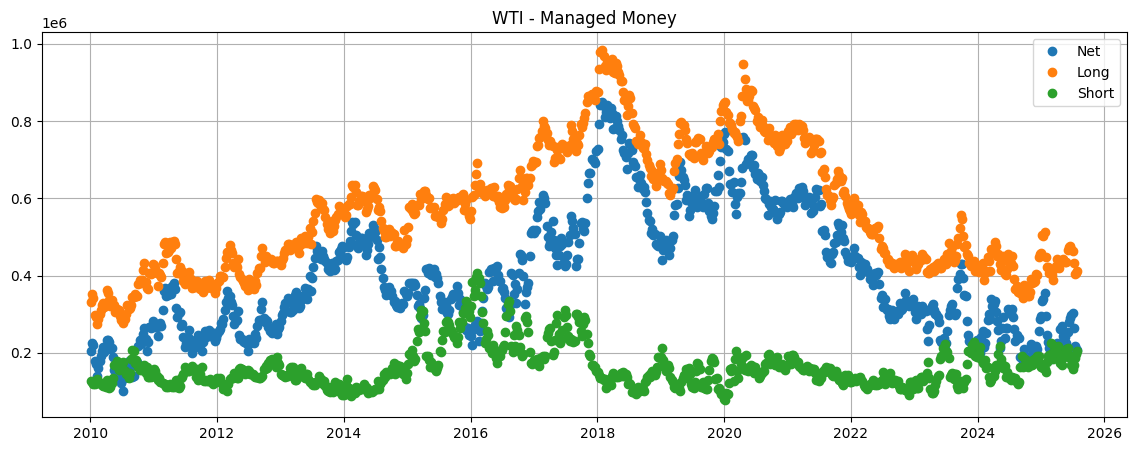

In [18]:
plt.rcParams["figure.figsize"] = (14,5)
plt.plot_date(dataset['tradeDate'],dataset['ManagedMoney_NetPosition'])
plt.plot_date(dataset['tradeDate'],dataset['ManagedMoney_LongPosition'])
plt.plot_date(dataset['tradeDate'],dataset['ManagedMoney_ShortPosition'])
plt.legend(['Net', 'Long', 'Short'])
plt.title('WTI - Managed Money')
plt.grid()

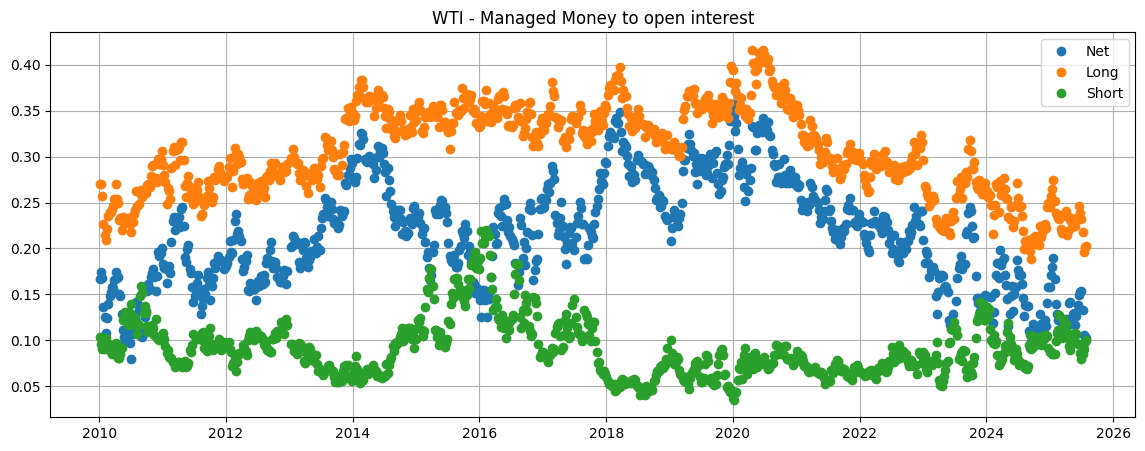

In [19]:
plt.rcParams["figure.figsize"] = (14,5)
plt.plot_date(dataset['tradeDate'],dataset['ManagedMoney_NetPosition_to_openinterest'])
plt.plot_date(dataset['tradeDate'],dataset['ManagedMoney_LongPosition_to_openinterest'])
plt.plot_date(dataset['tradeDate'],dataset['ManagedMoney_ShortPosition_to_openinterest'])
plt.legend(['Net', 'Long', 'Short'])
plt.title('WTI - Managed Money to open interest')
plt.grid()

In [20]:
dataset['tradeDate'] = pd.to_datetime(dataset['tradeDate'])
dataset['year']=dataset['tradeDate'].dt.year
dataset['day_of_week'] = dataset['tradeDate'].dt.day_name()
dataset['day_of_week'].unique()
dataset.sort_values(by = 'tradeDate', ascending = True, inplace = True)


In [21]:




# for feature_name in [
#                     'ManagedMoney_NetPosition',
#                     'ManagedMoney_LongPosition', 
#                     'ManagedMoney_ShortPosition']:
#     dataset[f'prior_report_{feature_name}_change'] = dataset[feature_name]- dataset[feature_name].shift(1)






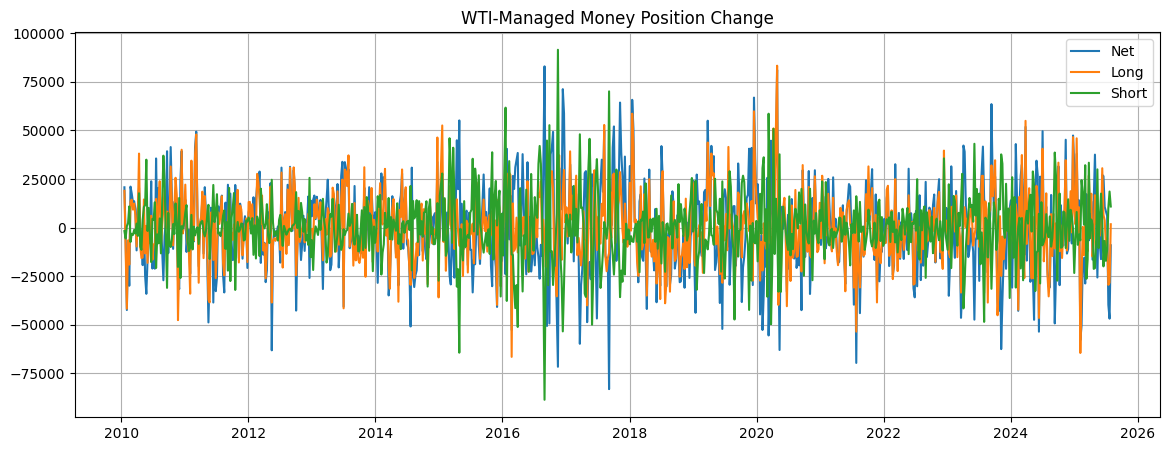

In [22]:
plt.rcParams["figure.figsize"] = (14,5)
plt.plot_date(dataset['tradeDate'],dataset['prior_report_ManagedMoney_NetPosition_change'], '-')
plt.plot_date(dataset['tradeDate'],dataset['prior_report_ManagedMoney_LongPosition_change'], '-')
plt.plot_date(dataset['tradeDate'],dataset['prior_report_ManagedMoney_ShortPosition_change'], '-')
plt.legend(['Net', 'Long', 'Short'])
plt.title('WTI-Managed Money Position Change')
plt.grid()

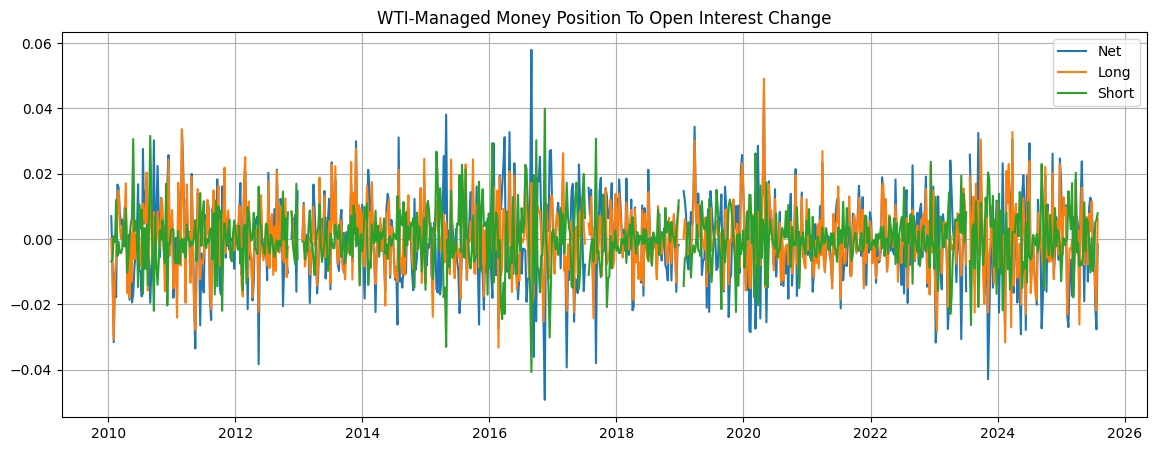

In [23]:
plt.rcParams["figure.figsize"] = (14,5)
plt.plot_date(dataset['tradeDate'],dataset['prior_report_ManagedMoney_NetPosition_to_openinterest_change'], '-')
plt.plot_date(dataset['tradeDate'],dataset['prior_report_ManagedMoney_LongPosition_to_openinterest_change'], '-')
plt.plot_date(dataset['tradeDate'],dataset['prior_report_ManagedMoney_ShortPosition_to_openinterest_change'], '-')
plt.legend(['Net', 'Long', 'Short'])
plt.title('WTI-Managed Money Position To Open Interest Change')
plt.grid()

In [24]:
dataset[['prior_report_ManagedMoney_NetPosition_change',
 'prior_report_ManagedMoney_LongPosition_change',
 'prior_report_ManagedMoney_ShortPosition_change']].corr()

,prior_report_ManagedMoney_NetPosition_change,prior_report_ManagedMoney_LongPosition_change,prior_report_ManagedMoney_ShortPosition_change
prior_report_ManagedMoney_NetPosition_change,1.000000,0.698553,-0.621261
prior_report_ManagedMoney_LongPosition_change,0.698553,1.000000,0.126730
prior_report_ManagedMoney_ShortPosition_change,-0.621261,0.126730,1.000000


In [25]:
dataset[['prior_report_ManagedMoney_NetPosition_to_openinterest_change',
 'prior_report_ManagedMoney_LongPosition_to_openinterest_change',
 'prior_report_ManagedMoney_ShortPosition_to_openinterest_change']].corr()

,prior_report_ManagedMoney_NetPosition_to_openinterest_change,prior_report_ManagedMoney_LongPosition_to_openinterest_change,prior_report_ManagedMoney_ShortPosition_to_openinterest_change
prior_report_ManagedMoney_NetPosition_to_openinterest_change,1.000000,0.746513,-0.595407
prior_report_ManagedMoney_LongPosition_to_openinterest_change,0.746513,1.000000,0.090095
prior_report_ManagedMoney_ShortPosition_to_openinterest_change,-0.595407,0.090095,1.000000


Text(0.5, 1.0, 'MM Long/OI  change')

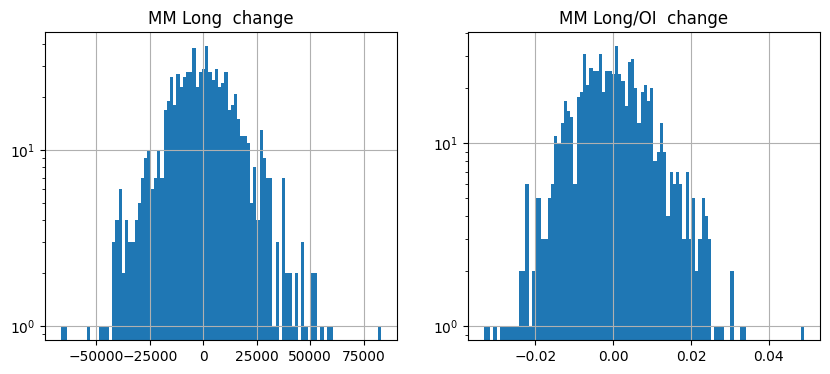

In [26]:
plt.rcParams["figure.figsize"] = (10,4)
plt.subplot(1, 2, 1)
dataset['prior_report_ManagedMoney_LongPosition_change'].hist(bins=100, log=True)
plt.title('MM Long  change')
plt.subplot(1, 2, 2)
dataset['prior_report_ManagedMoney_LongPosition_to_openinterest_change'].hist(bins=100, log=True)
plt.title('MM Long/OI  change')


Text(0.5, 1.0, 'MM Short/OI change')

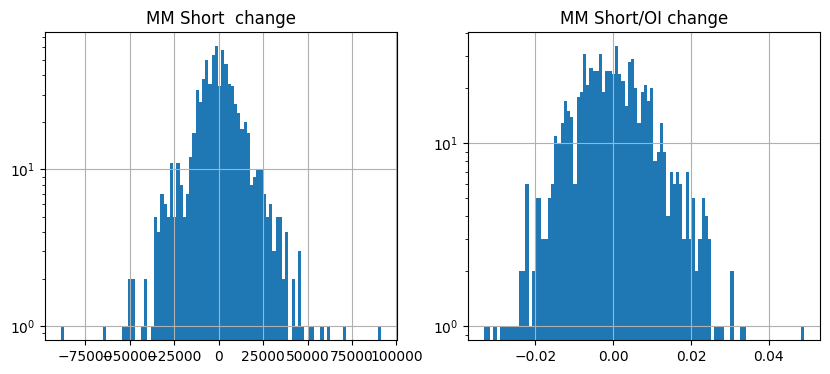

In [27]:
plt.rcParams["figure.figsize"] = (10,4)
plt.subplot(1, 2, 1)
dataset['prior_report_ManagedMoney_ShortPosition_change'].hist(bins=100, log=True)
plt.title('MM Short  change')
plt.subplot(1, 2, 2)
dataset['prior_report_ManagedMoney_LongPosition_to_openinterest_change'].hist(bins=100, log=True)
plt.title('MM Short/OI change')

Text(0.5, 1.0, 'MM Net/OI  change')

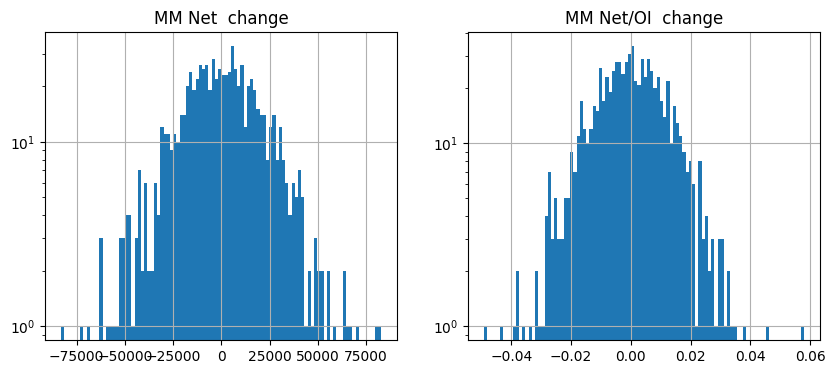

In [28]:
plt.rcParams["figure.figsize"] = (10,4)
plt.subplot(1, 2, 1)
dataset['prior_report_ManagedMoney_NetPosition_change'].hist(bins=100, log=True)
plt.title('MM Net  change')
plt.subplot(1, 2, 2)
dataset['prior_report_ManagedMoney_NetPosition_to_openinterest_change'].hist(bins=100, log=True)
plt.title('MM Net/OI  change')



In [29]:
from research.eda.probability_distributions import test_normality_shapiro

In [30]:
for f in ['prior_report_ManagedMoney_NetPosition_change', 
         'prior_report_ManagedMoney_LongPosition_change',
         'prior_report_ManagedMoney_ShortPosition_change']:
    print(f)
    result = test_normality_shapiro(
    dataset[f]
    )
    print(result)


prior_report_ManagedMoney_NetPosition_change
{'statistic': np.float64(0.995559740089882), 'p_value': np.float64(0.01969459423372518), 'alpha': 0.05, 'verdict': 'Not normal'}
prior_report_ManagedMoney_LongPosition_change
{'statistic': np.float64(0.9901801567195244), 'p_value': np.float64(3.053731578448485e-05), 'alpha': 0.05, 'verdict': 'Not normal'}
prior_report_ManagedMoney_ShortPosition_change
{'statistic': np.float64(0.9575340012558585), 'p_value': np.float64(1.4412830154224248e-14), 'alpha': 0.05, 'verdict': 'Not normal'}


In [31]:
for f in ['prior_report_ManagedMoney_NetPosition_to_openinterest_change', 
         'prior_report_ManagedMoney_LongPosition_to_openinterest_change',
         'prior_report_ManagedMoney_ShortPosition_to_openinterest_change']:
    print(f)
    result = test_normality_shapiro(
    dataset[f]
    )
    print(result)


prior_report_ManagedMoney_NetPosition_to_openinterest_change
{'statistic': np.float64(0.9958801741964916), 'p_value': np.float64(0.03275278325300736), 'alpha': 0.05, 'verdict': 'Not normal'}
prior_report_ManagedMoney_LongPosition_to_openinterest_change
{'statistic': np.float64(0.9941121033470517), 'p_value': np.float64(0.003284923692903788), 'alpha': 0.05, 'verdict': 'Not normal'}
prior_report_ManagedMoney_ShortPosition_to_openinterest_change
{'statistic': np.float64(0.9739576033756188), 'p_value': np.float64(9.715050484114977e-11), 'alpha': 0.05, 'verdict': 'Not normal'}


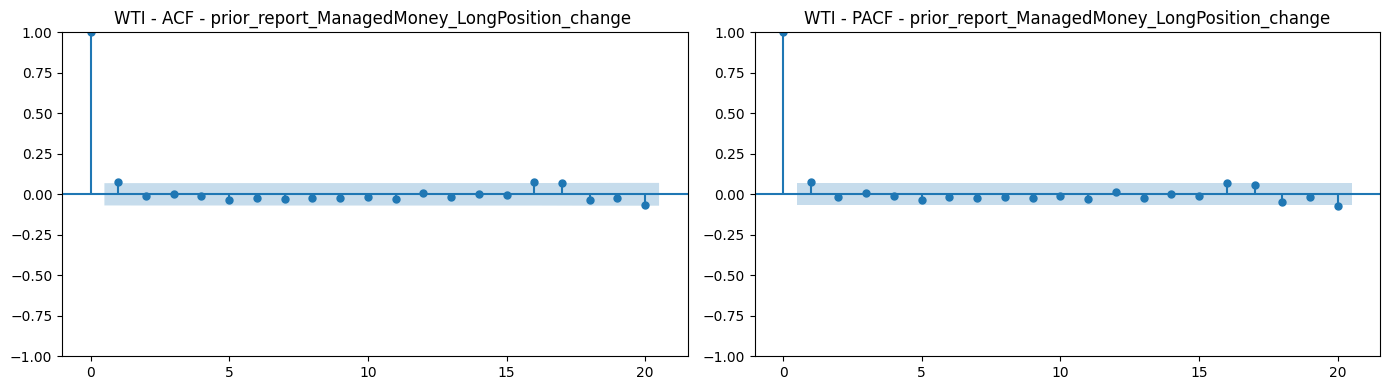

In [32]:

fig, axes = plt.subplots(1, 2, figsize=(14, 4))

plot_acf(dataset['prior_report_ManagedMoney_LongPosition_change'].dropna(), lags=20, ax=axes[0])
axes[0].set_title("WTI - ACF - prior_report_ManagedMoney_LongPosition_change ")

plot_pacf(dataset['prior_report_ManagedMoney_LongPosition_change'].dropna(), lags=20, ax=axes[1], method='ywm')  # 'ywm' is robust
axes[1].set_title("WTI - PACF - prior_report_ManagedMoney_LongPosition_change")

plt.tight_layout()
plt.show()

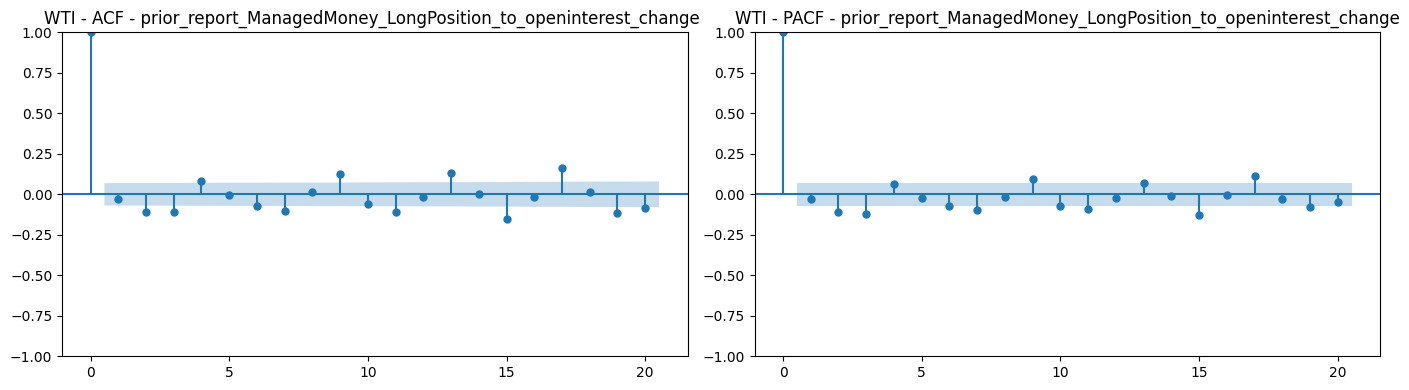

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

plot_acf(dataset['prior_report_ManagedMoney_LongPosition_to_openinterest_change'].dropna(), lags=20, ax=axes[0])
axes[0].set_title("WTI - ACF - prior_report_ManagedMoney_LongPosition_to_openinterest_change ")

plot_pacf(dataset['prior_report_ManagedMoney_LongPosition_to_openinterest_change'].dropna(), lags=20, ax=axes[1], method='ywm')  # 'ywm' is robust
axes[1].set_title("WTI - PACF - prior_report_ManagedMoney_LongPosition_to_openinterest_change")

plt.tight_layout()
plt.show()

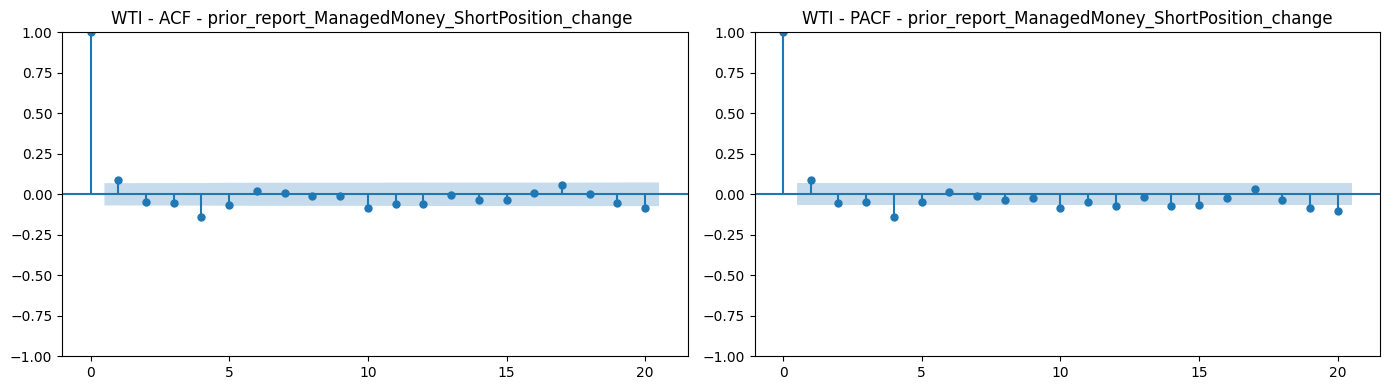

In [34]:

fig, axes = plt.subplots(1, 2, figsize=(14, 4))

plot_acf(dataset['prior_report_ManagedMoney_ShortPosition_change'].dropna(), lags=20, ax=axes[0])
axes[0].set_title("WTI - ACF - prior_report_ManagedMoney_ShortPosition_change ")

plot_pacf(dataset['prior_report_ManagedMoney_ShortPosition_change'].dropna(), lags=20, ax=axes[1], method='ywm')  # 'ywm' is robust
axes[1].set_title("WTI - PACF - prior_report_ManagedMoney_ShortPosition_change")

plt.tight_layout()
plt.show()

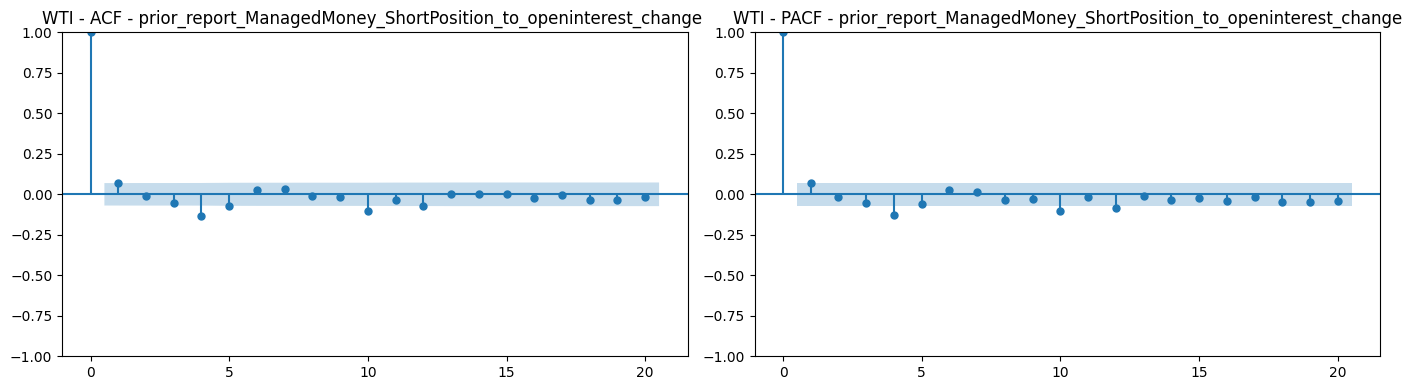

In [35]:
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

plot_acf(dataset['prior_report_ManagedMoney_ShortPosition_to_openinterest_change'].dropna(), lags=20, ax=axes[0])
axes[0].set_title("WTI - ACF - prior_report_ManagedMoney_ShortPosition_to_openinterest_change ")

plot_pacf(dataset['prior_report_ManagedMoney_ShortPosition_to_openinterest_change'].dropna(), lags=20, ax=axes[1], method='ywm')  # 'ywm' is robust
axes[1].set_title("WTI - PACF - prior_report_ManagedMoney_ShortPosition_to_openinterest_change")

plt.tight_layout()
plt.show()

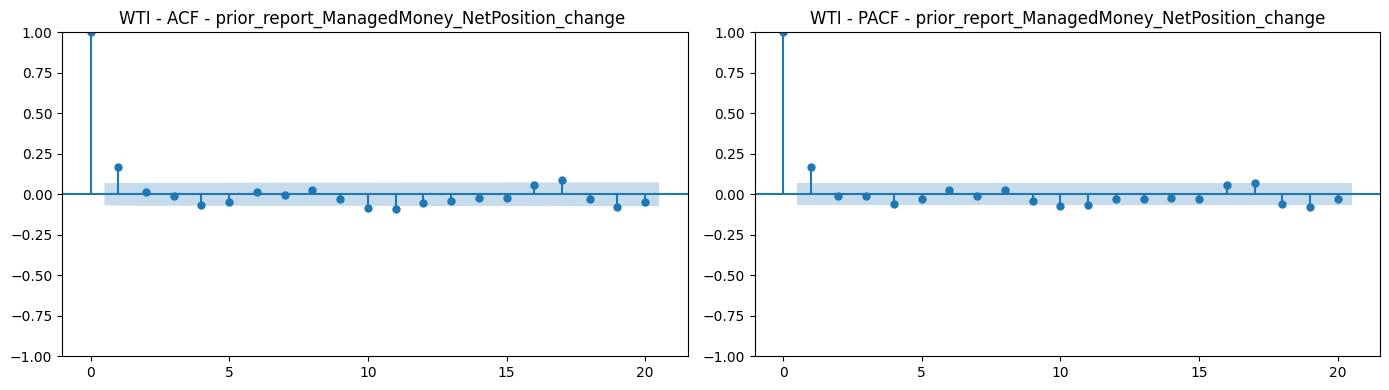

In [36]:

fig, axes = plt.subplots(1, 2, figsize=(14, 4))

plot_acf(dataset['prior_report_ManagedMoney_NetPosition_change'].dropna(), lags=20, ax=axes[0])
axes[0].set_title("WTI - ACF - prior_report_ManagedMoney_NetPosition_change ")

plot_pacf(dataset['prior_report_ManagedMoney_NetPosition_change'].dropna(), lags=20, ax=axes[1], method='ywm')  # 'ywm' is robust
axes[1].set_title("WTI - PACF - prior_report_ManagedMoney_NetPosition_change")

plt.tight_layout()
plt.show()

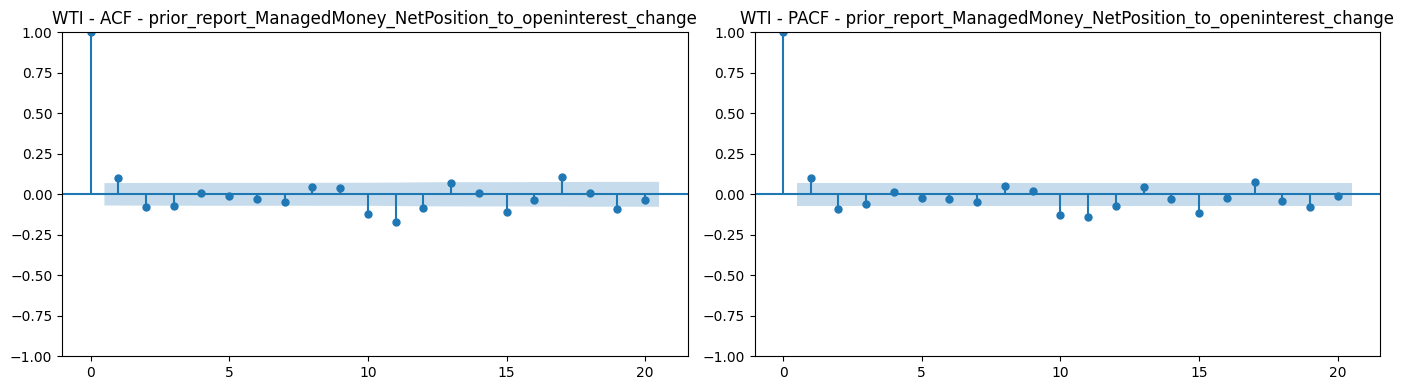

In [37]:
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

plot_acf(dataset['prior_report_ManagedMoney_NetPosition_to_openinterest_change'].dropna(), lags=20, ax=axes[0])
axes[0].set_title("WTI - ACF - prior_report_ManagedMoney_NetPosition_to_openinterest_change")

plot_pacf(dataset['prior_report_ManagedMoney_NetPosition_to_openinterest_change'].dropna(), lags=20, ax=axes[1], method='ywm')  # 'ywm' is robust
axes[1].set_title("WTI - PACF - prior_report_ManagedMoney_NetPosition_to_openinterest_change")

plt.tight_layout()
plt.show()

In [38]:
## Cache: Feature Definitions (shared across horizons)
import json
from pathlib import Path
from src.settings import OUTPUT_DIR

feature_definitions_dir = OUTPUT_DIR / "wti" / "mm"
feature_definitions_dir.mkdir(parents=True, exist_ok=True)

feature_definitions = {
    "ticker": "wti",
    "investor_type": "mm",
    "features": [
        {"name": "prior_report_ManagedMoney_NetPosition_change", "description": "Week-over-week change in MM net position from prior COT report", "category": "cot_position"},
        {"name": "prior_report_ManagedMoney_LongPosition_change", "description": "Week-over-week change in MM long position from prior COT report", "category": "cot_position"},
        {"name": "prior_report_ManagedMoney_ShortPosition_change", "description": "Week-over-week change in MM short position from prior COT report", "category": "cot_position"},
        {"name": "prior_report_ManagedMoney_NetPosition_to_openinterest_change", "description": "Week-over-week change in MM net position as pct of open interest", "category": "cot_position_to_oi"},
        {"name": "prior_report_ManagedMoney_LongPosition_to_openinterest_change", "description": "Week-over-week change in MM long position as pct of open interest", "category": "cot_position_to_oi"},
        {"name": "prior_report_ManagedMoney_ShortPosition_to_openinterest_change", "description": "Week-over-week change in MM short position as pct of open interest", "category": "cot_position_to_oi"},
        {"name": "prior_report_SyntheticF1MinusF2_RolledPrice_change", "description": "Week-over-week change in F1-F2 calendar spread price", "category": "spread"},
        {"name": "prior_cumulative_5D_F1_Volume_change", "description": "Change in cumulative 5-day front-month volume vs prior week", "category": "volume"},
        {"name": "prior_cumulative_5D_F2_Volume_change", "description": "Change in cumulative 5-day second-month volume vs prior week", "category": "volume"},
        {"name": "prior_cumulative_5D_F1MinusF2_Volume_change", "description": "Change in cumulative 5-day F1-F2 volume spread vs prior week", "category": "volume"},
        {"name": "prior_5D_F1_OI_change", "description": "5-day change in front-month open interest", "category": "open_interest"},
        {"name": "prior_5D_F2_OI_change", "description": "5-day change in second-month open interest", "category": "open_interest"},
        {"name": "prior_5D_AGG_OI_change", "description": "5-day change in aggregate open interest", "category": "open_interest"},
        {"name": "prior_5D_F1MinusF2_openinterest_change", "description": "5-day change in F1-F2 open interest spread", "category": "open_interest"},
        {"name": "F1_RolledPrice_rolling_20D_volatility", "description": "20-day rolling volatility of front-month rolled price", "category": "volatility"},
        {"name": "F2_RolledPrice_rolling_20D_volatility", "description": "20-day rolling volatility of second-month rolled price", "category": "volatility"},
        {"name": "F3_RolledPrice_rolling_20D_volatility", "description": "20-day rolling volatility of third-month rolled price", "category": "volatility"},
        {"name": "F1_RolledPrice_change", "description": "Week-over-week change in front-month rolled price", "category": "price"},
        {"name": "F2_RolledPrice_change", "description": "Week-over-week change in second-month rolled price", "category": "price"},
        {"name": "F3_RolledPrice_change", "description": "Week-over-week change in third-month rolled price", "category": "price"},
    ]
}

with open(feature_definitions_dir / "feature_definitions.json", "w") as f:
    json.dump(feature_definitions, f, indent=2)
print(f"Saved feature_definitions.json to {feature_definitions_dir}")

Saved feature_definitions.json to /Users/oualid/Documents/Projects/omroot_repos/COTAME/cache/output/wti/mm


In [39]:
## Cache: Feature-Response Correlations (nowcast)
nowcast_output_dir = OUTPUT_DIR / "wti" / "mm" / "nowcast"
nowcast_output_dir.mkdir(parents=True, exist_ok=True)

feature_names = [
    'prior_report_ManagedMoney_NetPosition_change',
    'prior_report_ManagedMoney_LongPosition_change',
    'prior_report_ManagedMoney_ShortPosition_change',
    'prior_report_ManagedMoney_NetPosition_to_openinterest_change',
    'prior_report_ManagedMoney_LongPosition_to_openinterest_change',
    'prior_report_ManagedMoney_ShortPosition_to_openinterest_change',
    'prior_report_SyntheticF1MinusF2_RolledPrice_change',
    'prior_cumulative_5D_F1_Volume_change',
    'prior_cumulative_5D_F2_Volume_change',
    'prior_cumulative_5D_F1MinusF2_Volume_change',
    'prior_5D_F1_OI_change',
    'prior_5D_F2_OI_change',
    'prior_5D_AGG_OI_change',
    'prior_5D_F1MinusF2_openinterest_change',
    'F1_RolledPrice_rolling_20D_volatility',
    'F2_RolledPrice_rolling_20D_volatility',
    'F3_RolledPrice_rolling_20D_volatility',
    'F1_RolledPrice_change',
    'F2_RolledPrice_change',
    'F3_RolledPrice_change'
]

unscaled_response_names = [
    'ManagedMoney_NetPosition_change',
    'ManagedMoney_LongPosition_change',
    'ManagedMoney_ShortPosition_change'
]
scaled_response_names = [
    'ManagedMoney_NetPosition_to_openinterest_change',
    'ManagedMoney_LongPosition_to_openinterest_change',
    'ManagedMoney_ShortPosition_to_openinterest_change'
]

all_response_names = unscaled_response_names + scaled_response_names

corr_df = get_features_responses_correlation(
    dataset=dataset,
    features=feature_names,
    responses=all_response_names
)

correlations_cache = {
    "ticker": "wti",
    "investor_type": "mm",
    "horizon": "nowcast",
    "method": "spearman",
    "correlations": corr_df.to_dict(orient='list')
}

with open(nowcast_output_dir / "01_feature_response_correlations.json", "w") as f:
    json.dump(correlations_cache, f, indent=2)
print(f"Saved 01_feature_response_correlations.json to {nowcast_output_dir}")

Saved 01_feature_response_correlations.json to /Users/oualid/Documents/Projects/omroot_repos/COTAME/cache/output/wti/mm/nowcast
